# Project Description

In this project I want to understand the relationship between income with different variables like education, race and gender. In addition I want to build a supervised machine learning model to predict whether a person makes more than $50K a year.

**Data** 

>This dataset is downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult) originally curated based on 1994 census data. 

**Questions I want to answer**

1. What is the relationship between education and income?
2. What is the relationship between age and income?
3. What is the relationship between immigrant status and income?
4. Is there a significant difference in the proportion of people who make more than `$`50K based on sex? 
5. Are capital gains/losses associated with people with high income (>`$`50K)?
6. Do people who work overtime make more money in general than others?

In [1]:
# %load ../../../../useful_codes/importing_code.py
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
%config Completer.use_jedi = False

from matplotlib import rcParams 
rcParams['figure.figsize'] = 15,6

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

In [2]:
# column names in the dataset
col_names = ['age','workclass','fnlwgt','education','education_num','marital_status',\
            'occupation','relationship','race','sex','capital_gains','capital_losses',\
            'hrs_per_week','native_country','income']

In [3]:
df = pd.read_csv('../../data/adult_training_data.csv', header=None,\
                 names=col_names, na_values='?', sep=', ')

<ipython-input-3-3195581f440e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('../../data/adult_training_data.csv', header=None,\


## Summary Stats 

In [4]:
df.shape

(32561, 15)

In [5]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gains        0
capital_losses       0
hrs_per_week         0
native_country     583
income               0
dtype: int64

In [6]:
df['missing_workclass'] = np.where(df.workclass.isnull(),1,0)
df['missing_occupation'] = np.where(df.occupation.isnull(),1,0)
df['missing_country'] = np.where(df.native_country.isnull(),1,0)

In [7]:
df.groupby(['missing_workclass','missing_occupation','missing_country']).size()

missing_workclass  missing_occupation  missing_country
0                  0                   0                  30162
                                       1                    556
                   1                   0                      7
1                  1                   0                   1809
                                       1                     27
dtype: int64

same rows missing workclass are also missing occupation. 

In [8]:
df.describe()

,age,fnlwgt,education_num,capital_gains,capital_losses,hrs_per_week,missing_workclass,missing_occupation,missing_country
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.056386,0.056601,0.017905
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.230670,0.231083,0.132608
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000


## Univariate Analysis 

**Distribution of Age**

/Users/nagakamisetti/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

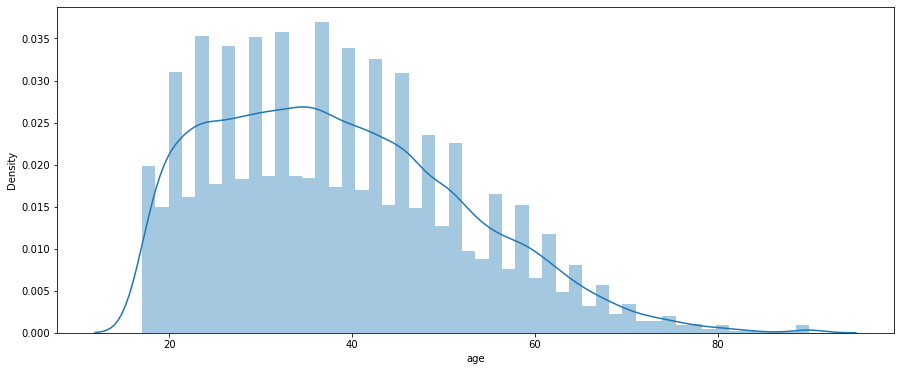

In [9]:
sns.distplot(df.age)

**Distribution of fnlwgt**

/Users/nagakamisetti/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

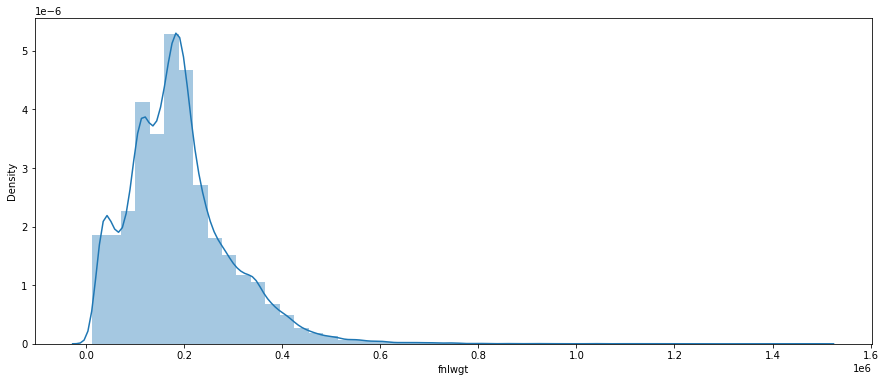

In [10]:
sns.distplot(df.fnlwgt)

In [11]:
df.fnlwgt.describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [12]:
# I don't think this is a important variable for predicting income


**Distribution of education**

<AxesSubplot:>

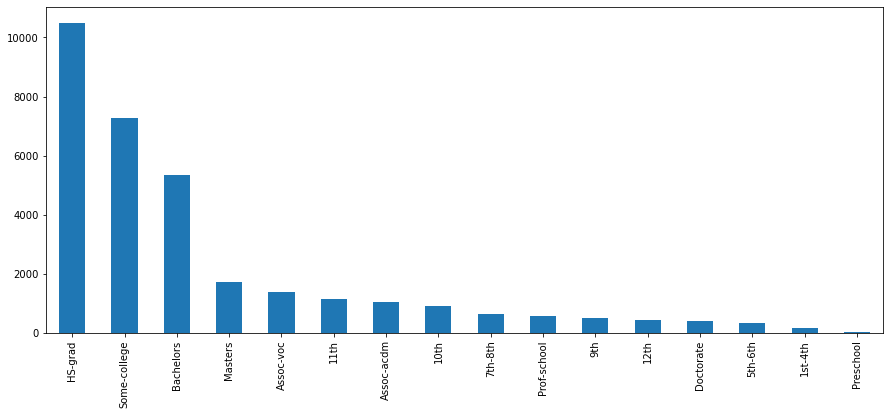

In [13]:
df.education.value_counts().plot(kind='bar')

In [14]:
# Should I keep the categories as is or should I merge some of them? 
# try both and see if this helps increase auc, accuracy. 

<AxesSubplot:>

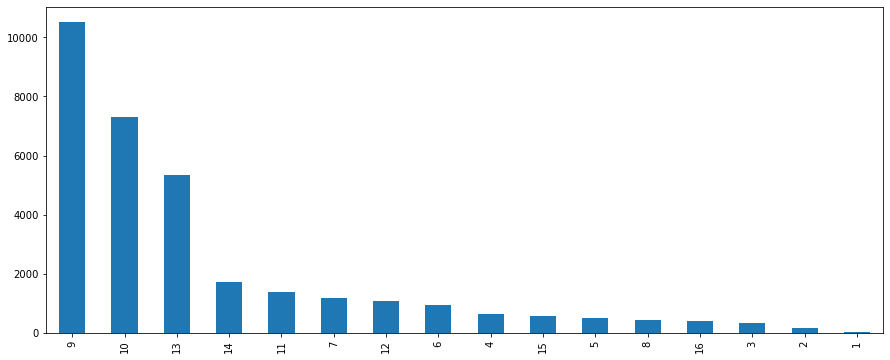

In [15]:
df.education_num.value_counts().plot(kind='bar')

<AxesSubplot:>

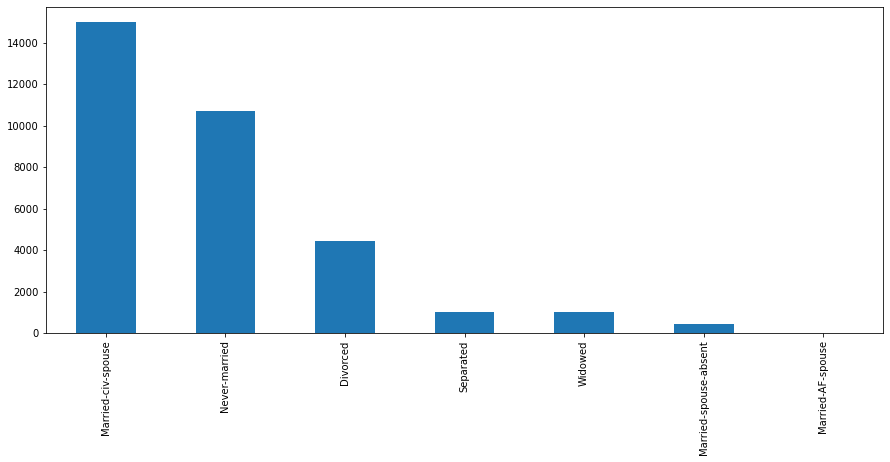

In [16]:
df.marital_status.value_counts().plot(kind='bar')

<AxesSubplot:>

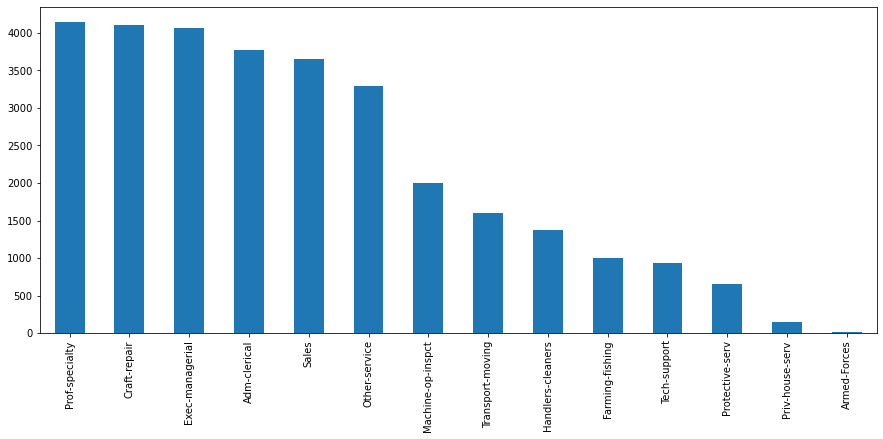

In [17]:
df.occupation.value_counts().plot(kind='bar')

In [18]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [19]:
df.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [20]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [21]:
df[df.relationship=='Husband'].sex.value_counts()

Male      13192
Female        1
Name: sex, dtype: int64

In [22]:
df[(df.relationship=='Husband')&(df.sex=='Female')]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gains,capital_losses,hrs_per_week,native_country,income,missing_workclass,missing_occupation,missing_country
7109,34,Private,175878,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Female,0,0,40,United-States,<=50K,0,0,0


In [23]:
df.groupby(['relationship','sex']).size()

relationship    sex   
Husband         Female        1
                Male      13192
Not-in-family   Female     3875
                Male       4430
Other-relative  Female      430
                Male        551
Own-child       Female     2245
                Male       2823
Unmarried       Female     2654
                Male        792
Wife            Female     1566
                Male          2
dtype: int64

In [24]:
df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gains', 'capital_losses', 'hrs_per_week',
       'native_country', 'income', 'missing_workclass',
       'missing_occupation', 'missing_country'], dtype=object)

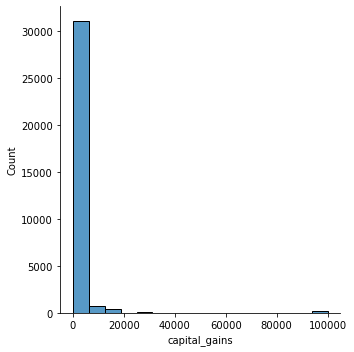

In [25]:
sns.displot(df.capital_gains)

In [26]:
df.capital_gains.describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gains, dtype: float64

In [27]:
df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gains', 'capital_losses', 'hrs_per_week',
       'native_country', 'income', 'missing_workclass',
       'missing_occupation', 'missing_country'], dtype=object)

In [28]:
df[df.capital_gains>99990].capital_gains.sum()

15899841

In [29]:
159*99999

15899841

In [30]:
df[(df.workclass.isnull())&(df.capital_gains>80000)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gains,capital_losses,hrs_per_week,native_country,income,missing_workclass,missing_occupation,missing_country
12093,24,NaN,151153,Some-college,10,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Male,99999,0,50,South,>50K,1,1,0
17644,61,NaN,139391,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,99999,0,30,United-States,>50K,1,1,0
19133,69,NaN,323016,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,99999,0,40,United-States,>50K,1,1,0
19438,58,NaN,266792,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,99999,0,40,United-States,>50K,1,1,0


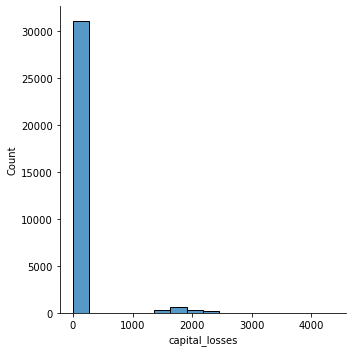

In [31]:
sns.displot(df.capital_losses)

In [32]:
df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gains', 'capital_losses', 'hrs_per_week',
       'native_country', 'income', 'missing_workclass',
       'missing_occupation', 'missing_country'], dtype=object)

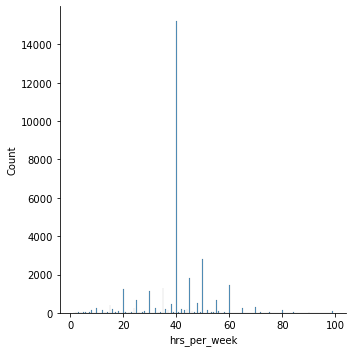

In [33]:
sns.displot(df.hrs_per_week)

In [34]:
df['income_class'] = np.where(df.income=='>50K',1,0)

In [35]:
df.income_class.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: income_class, dtype: float64

In [36]:
df_high = df[df.income_class==1]
df_low = df[df.income_class==0]

In [37]:
df_high.hrs_per_week.describe()

count    7841.000000
mean       45.473026
std        11.012971
min         1.000000
25%        40.000000
50%        40.000000
75%        50.000000
max        99.000000
Name: hrs_per_week, dtype: float64

In [38]:
df_low.hrs_per_week.describe()

count    24720.000000
mean        38.840210
std         12.318995
min          1.000000
25%         35.000000
50%         40.000000
75%         40.000000
max         99.000000
Name: hrs_per_week, dtype: float64

In [39]:
df.native_country.value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [40]:
def get_worktype(workclass):
    """
    This function takes workclass
    and returns worktype based on the 
    value in the workclass.
    
    input: workclass
    output: worktype
    """
    
    gov_list = ['Local-gov','State-gov','Federal-gov']
    self_emp_list = ['Self-emp-not-inc','Self-emp-inc']
    nowork_list = ['Without-pay','Never-worked']
    
    if workclass in gov_list:
        return 'Government'
    elif workclass in self_emp_list:
        return 'Self-Employed'
    elif workclass in nowork_list:
        return 'not-working'
    else:
        return workclass

In [42]:
df['worktype'] = df.workclass.apply(get_worktype)

In [43]:
df.worktype.value_counts()

Private          22696
Government        4351
Self-Employed     3657
not-working         21
Name: worktype, dtype: int64

In [44]:
df['reported_capital_gains'] = np.where(df.capital_gains>0,1,0)
df['reported_capital_losses'] = np.where(df.capital_losses>0,1,0)
df['is_investor'] = np.where(((df.capital_gains>0)|(df.capital_losses>0)),1,0)

In [45]:
df.sample(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gains,capital_losses,hrs_per_week,native_country,income,missing_workclass,missing_occupation,missing_country,income_class,worktype,reported_capital_gains,reported_capital_losses,is_investor
9626,52,NaN,115209,Prof-school,15,Married-spouse-absent,NaN,Unmarried,Asian-Pac-Islander,Female,0,0,40,Vietnam,<=50K,1,1,0,0,NaN,0,0,0
25794,33,Private,36539,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K,0,0,0,1,Private,0,0,0
11599,22,Private,300871,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K,0,0,0,0,Private,0,0,0
27580,26,Private,89326,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,0,0,Private,0,0,0


# Multivariate Analysis

In [410]:
df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gains', 'capital_losses', 'hrs_per_week',
       'native_country', 'income', 'missing_workclass',
       'missing_occupation', 'missing_country', 'income_class',
       'worktype', 'reported_capital_gains', 'reported_capital_losses',
       'is_investor'], dtype=object)

**Age VS Income**

In [46]:
df.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [114]:
age_bins = pd.IntervalIndex.from_tuples([(0, 17), (18, 30), (31, 50),(51,65),(66,99)])

In [115]:
df['age_cat'] = pd.cut(df.age,age_bins)

In [99]:
def get_variable_target_correlation(df,categorical_variable,target):
    """
    """
    df_gby_cv = df.groupby([target, categorical_variable]).size()
    df_percentage = df_gby_cv.groupby(categorical_variable).apply(lambda x: (x*100)/x.sum()).unstack().transpose()
    
    return df_percentage
    

**Income VS Race**

In [104]:
income_age_df = get_variable_target_correlation(df,'age_cat', 'income_class')

<AxesSubplot:label='0bfdf802-c7e1-4fc6-8ca8-a748f4f72062', xlabel='age_cat'>

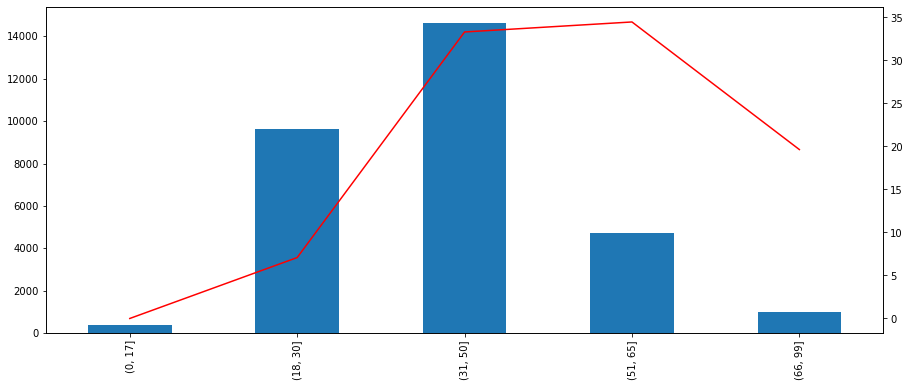

In [112]:
ax1 = df.age_cat.value_counts(sort=False).plot(kind='bar')
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
income_age_df[1].plot(ax=ax2, style='r-')


In [113]:
df.age_cat.value_counts()

(31, 50]    14641
(18, 30]     9627
(51, 65]     4707
(66, 99]     1008
(0, 17]       395
Name: age_cat, dtype: int64

In [116]:
income_sex_df = get_variable_target_correlation(df, 'sex','income_class')

In [117]:
income_sex_df

income_class,0,1
sex,,
Female,89.053941,10.946059
Male,69.426342,30.573658


In [118]:
income_investor_df = get_variable_target_correlation(df, 'is_investor','income_class')

In [119]:
income_investor_df

income_class,0,1
is_investor,,
0,80.970702,19.029298
1,42.094068,57.905932
